# House Price Prediction

The solution is divided into the following sections: 
- 1.Data understanding and exploration
 - 1.1 EDA & Data cleaning for Categorical Features
 - 1.2 EDA & Data cleaning for Numerical Features
- 2.Bivariate Analysis 
- 3.Data preparation
- 4.Model building and evaluation


## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
house.shape

(1460, 81)

In [4]:
# summary of the dataset
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check missing values

In [6]:
# row wise missing values
round(100*house.isnull().sum(axis=1).sort_values(ascending = False)/len(house.index),2)

1011    1.03
533     1.03
1218    1.03
39      1.03
705     0.96
1179    0.96
520     0.96
375     0.75
1035    0.75
1143    0.75
1030    0.75
287     0.75
1321    0.75
342     0.75
613     0.68
108     0.68
125     0.68
210     0.68
1219    0.68
1407    0.68
614     0.68
1412    0.68
710     0.68
102     0.68
1283    0.68
1000    0.68
960     0.68
1123    0.68
535     0.68
1234    0.68
1137    0.68
897     0.68
894     0.68
1009    0.68
148     0.68
434     0.68
868     0.68
528     0.68
1232    0.68
155     0.68
156     0.68
165     0.68
1323    0.68
441     0.68
386     0.68
241     0.68
970     0.68
259     0.68
1049    0.68
1257    0.68
1449    0.68
48      0.68
1450    0.68
749     0.68
1096    0.68
976     0.68
1090    0.68
826     0.68
1216    0.68
942     0.68
1453    0.68
736     0.68
1045    0.68
646     0.68
1326    0.68
582     0.68
984     0.68
738     0.68
78      0.68
464     0.68
843     0.68
89      0.68
90      0.68
954     0.68
307     0.62
778     0.62
1337    0.62

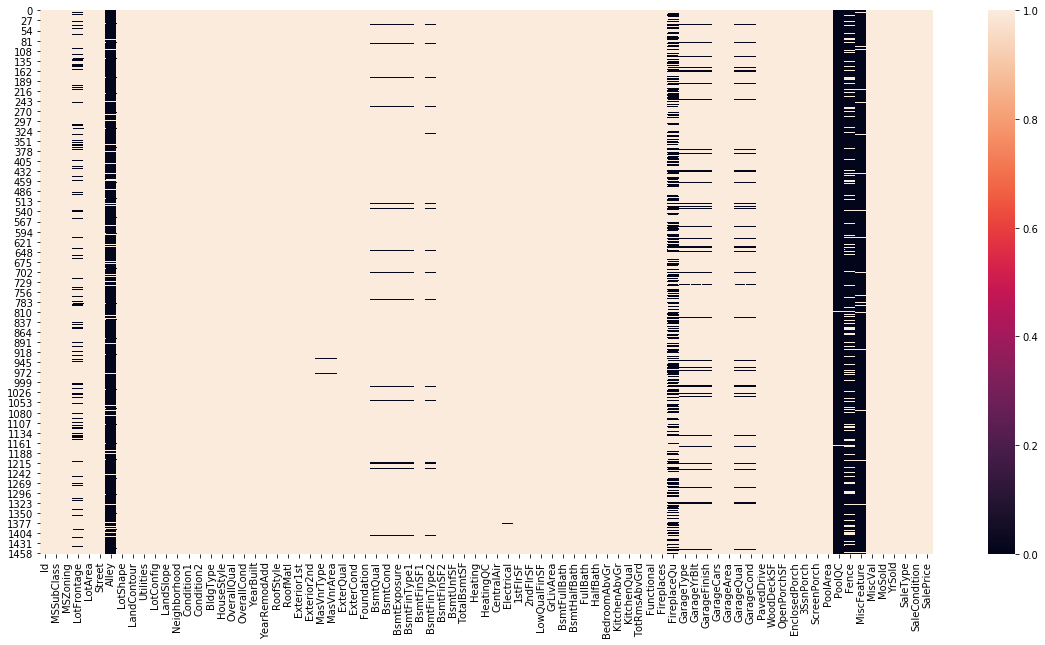

In [7]:
#vissualize missing values of columns using plot
plt.figure(figsize=(20,10))
sns.heatmap(house.notnull())
plt.show()

In [8]:
# columns wise missing values
round(house.isnull().mean().sort_values(ascending = False)*100,2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [9]:
# code for dropping the columns where missing values in columns > 50% 
cols = house.columns[house.isnull().mean()*100 >50]
house.drop(cols,axis=1,inplace=True)
house.shape

(1460, 77)

### 1.1 EDA & Data cleaning for Categorical Features

In [10]:
house.select_dtypes(include='O').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [11]:
house.select_dtypes(include = "O").describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198


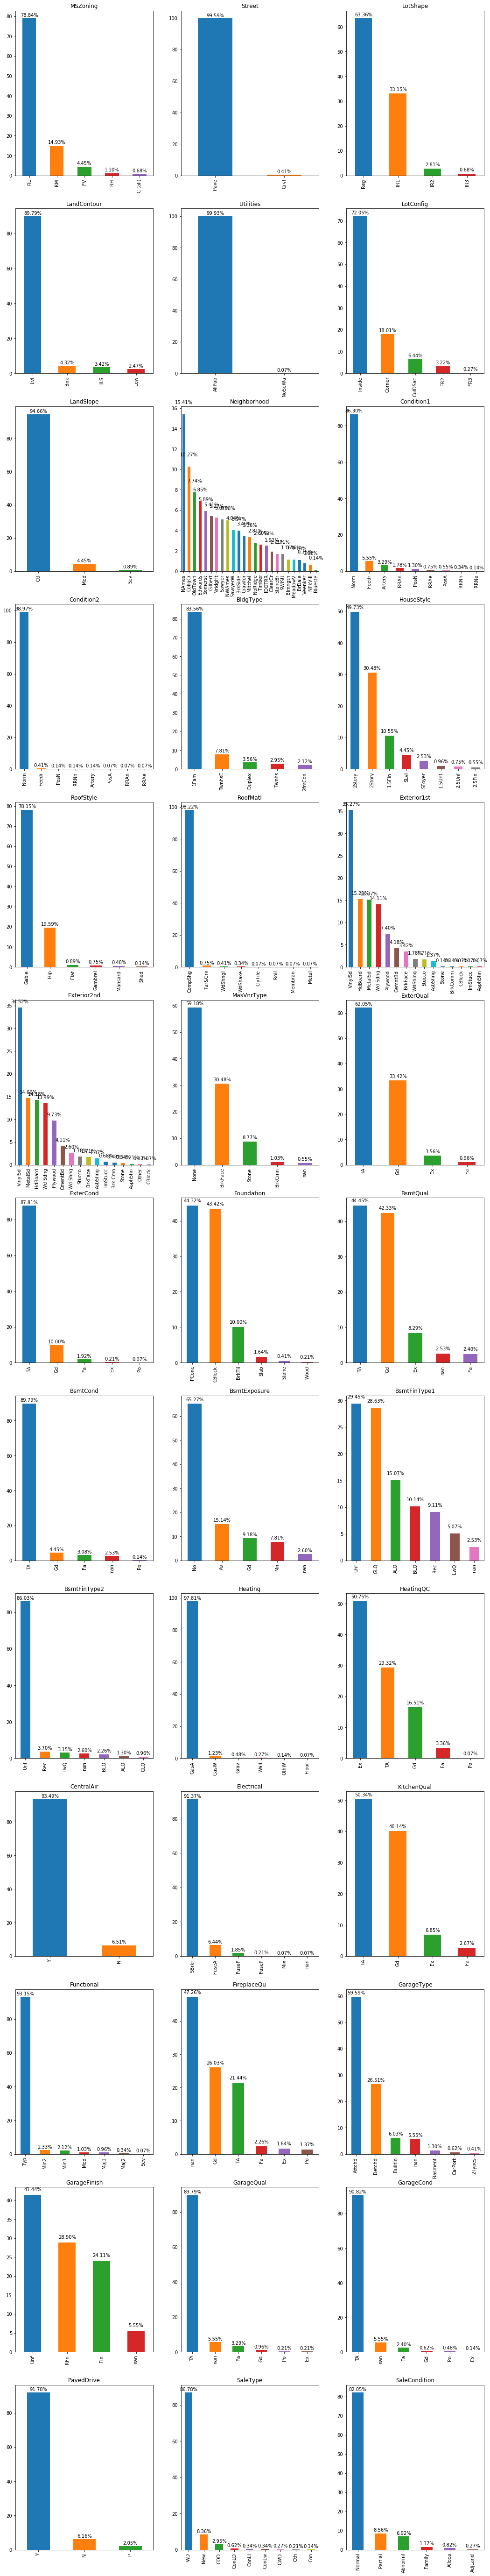

In [12]:
cat_faetures=house.select_dtypes(include = "O").columns
plt.figure(figsize=(18,100))
for i in enumerate(cat_faetures):
    plt.subplot(len(cat_faetures)/3,3,i[0]+1)
    ax=round(house[i[1]].value_counts(dropna=False,normalize=True)*100,2).plot(kind = "bar", title =i[1])
    for p in ax.patches:
        height = p.get_height()
        #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:1.2f}%'.format(height),
            ha="center",fontsize=10,rotation=0)

In [13]:
higly_skewed_features=['Street', 'Utilities','Condition2','RoofMatl','Heating',
                       'LandSlope','LandContour','BsmtCond','CentralAir','Electrical','Functional','GarageQual',
                       'GarageCond','PavedDrive']
house.drop(higly_skewed_features,axis=1,inplace=True)
house.shape

(1460, 63)

In [14]:
categorical_features=house.select_dtypes(include = "O")
cor=categorical_features.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

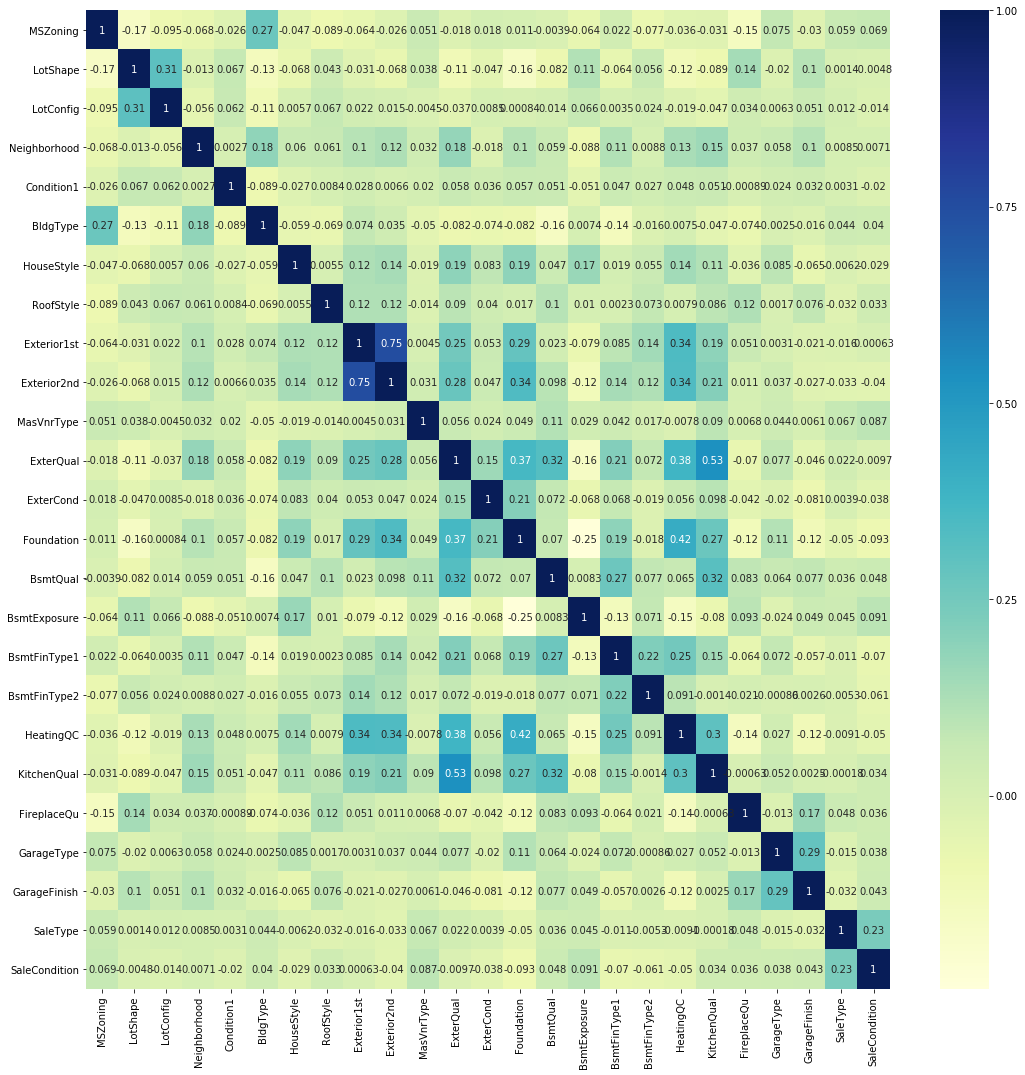

In [15]:
# heatmap to understand correlation
plt.figure(figsize=(18,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [16]:
# Check highly correlated features
corr = abs(categorical_features.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)).stack().reset_index().sort_values(0, ascending = False)
corr.columns = ["col1","col2","correlation"]
corr[(corr.col1 != corr.col2) & (corr.correlation > 0.7)]

,col1,col2,correlation
209,Exterior1st,Exterior2nd,0.749599
233,Exterior2nd,Exterior1st,0.749599


In [17]:
# Checking for null percentage
round(house.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100,2)

FireplaceQu      47.26
GarageFinish      5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
MasVnrType        0.55
SaleCondition     0.00
RoofStyle         0.00
LotShape          0.00
LotConfig         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
ExterCond         0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
SaleType          0.00
Foundation        0.00
HeatingQC         0.00
KitchenQual       0.00
MSZoning          0.00
dtype: float64

In [18]:
house.drop('FireplaceQu',axis=1,inplace=True)
house.shape

(1460, 62)

In [19]:
# Replacing meaningful missing 
house['GarageFinish'] = house['GarageFinish'].fillna('No Garage')
house['GarageType'] = house['GarageType'].fillna('No Garage')
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('No Basement')
house['BsmtExposure'] = house['BsmtExposure'].fillna('No Basement')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('No Basement')
house['BsmtQual'] = house['BsmtQual'].fillna('No Basement')

In [20]:
round(house.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100,2)

MasVnrType       0.55
SaleCondition    0.00
SaleType         0.00
LotShape         0.00
LotConfig        0.00
Neighborhood     0.00
Condition1       0.00
BldgType         0.00
HouseStyle       0.00
RoofStyle        0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinType2     0.00
HeatingQC        0.00
KitchenQual      0.00
GarageType       0.00
GarageFinish     0.00
MSZoning         0.00
dtype: float64

In [21]:
#Replacing with mode for missing value between 0 & 6%
less_missingValue=house.select_dtypes(include = "O").columns[(house.select_dtypes(include = "O").isnull().mean()*100>0) & 
                                                            (house.select_dtypes(include = "O").isnull().mean()*100<6)]
for i in enumerate(less_missingValue):
    house[i[1]] = house[i[1]].fillna(house[i[1]].mode()[0])

In [22]:
# Checking for null percentage
round(house.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100,2)

SaleCondition    0.0
SaleType         0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
HeatingQC        0.0
KitchenQual      0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
dtype: float64

### 1.2 EDA & Data cleaning for Numerical Features

In [23]:
house.select_dtypes(exclude = "O").head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [24]:
# Converting YearBuilt to Age 
house['Age']=2020-house['YearBuilt']
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,17
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,44
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,105
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,20


In [25]:
#Droping YearBuilt and other years columns
house.drop(['YearBuilt','GarageYrBlt','YrSold'],axis=1,inplace=True)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,208500,17
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,181500,44
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,140000,105
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,250000,20


In [26]:
house.select_dtypes(exclude = "O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [27]:
house.select_dtypes(exclude = "O").describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,48.732192
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,10.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,20.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,47.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,66.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,148.000000


In [28]:
round(house.select_dtypes(exclude = "O").isnull().mean().sort_values(ascending = False)*100,2)

LotFrontage      17.74
MasVnrArea        0.55
Age               0.00
BsmtFinSF2        0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
TotalBsmtSF       0.00
BsmtUnfSF         0.00
BsmtFinSF1        0.00
SalePrice         0.00
YearRemodAdd      0.00
OverallCond       0.00
OverallQual       0.00
LotArea           0.00
MSSubClass        0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
OpenPorchSF       0.00
MoSold            0.00
MiscVal           0.00
PoolArea          0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
WoodDeckSF        0.00
HalfBath          0.00
GarageArea        0.00
GarageCars        0.00
Fireplaces        0.00
TotRmsAbvGrd      0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
Id                0.00
dtype: float64

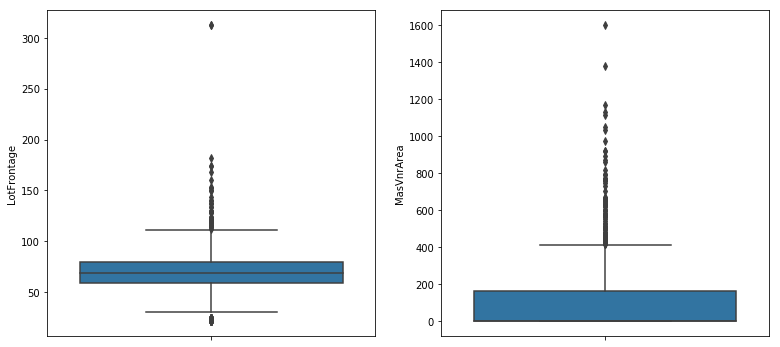

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot( y = "LotFrontage", data = house)
plt.subplot(1,3,2)
sns.boxplot( y = "MasVnrArea", data = house)

In [30]:
# Replacing null values with mode for column having outlier and mean where no outlier 
house["LotFrontage"] = house["LotFrontage"].fillna(house["LotFrontage"].mode()[0])
house["MasVnrArea"] = house["MasVnrArea"].fillna(house["MasVnrArea"].mode()[0])

In [31]:
round(house.select_dtypes(exclude = "O").isnull().mean().sort_values(ascending = False)*100,2)

Age              0.0
SalePrice        0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
TotalBsmtSF      0.0
BsmtUnfSF        0.0
BsmtFinSF2       0.0
BsmtFinSF1       0.0
MasVnrArea       0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
LotArea          0.0
LotFrontage      0.0
MSSubClass       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
OpenPorchSF      0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
WoodDeckSF       0.0
HalfBath         0.0
GarageArea       0.0
GarageCars       0.0
Fireplaces       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
Id               0.0
dtype: float64

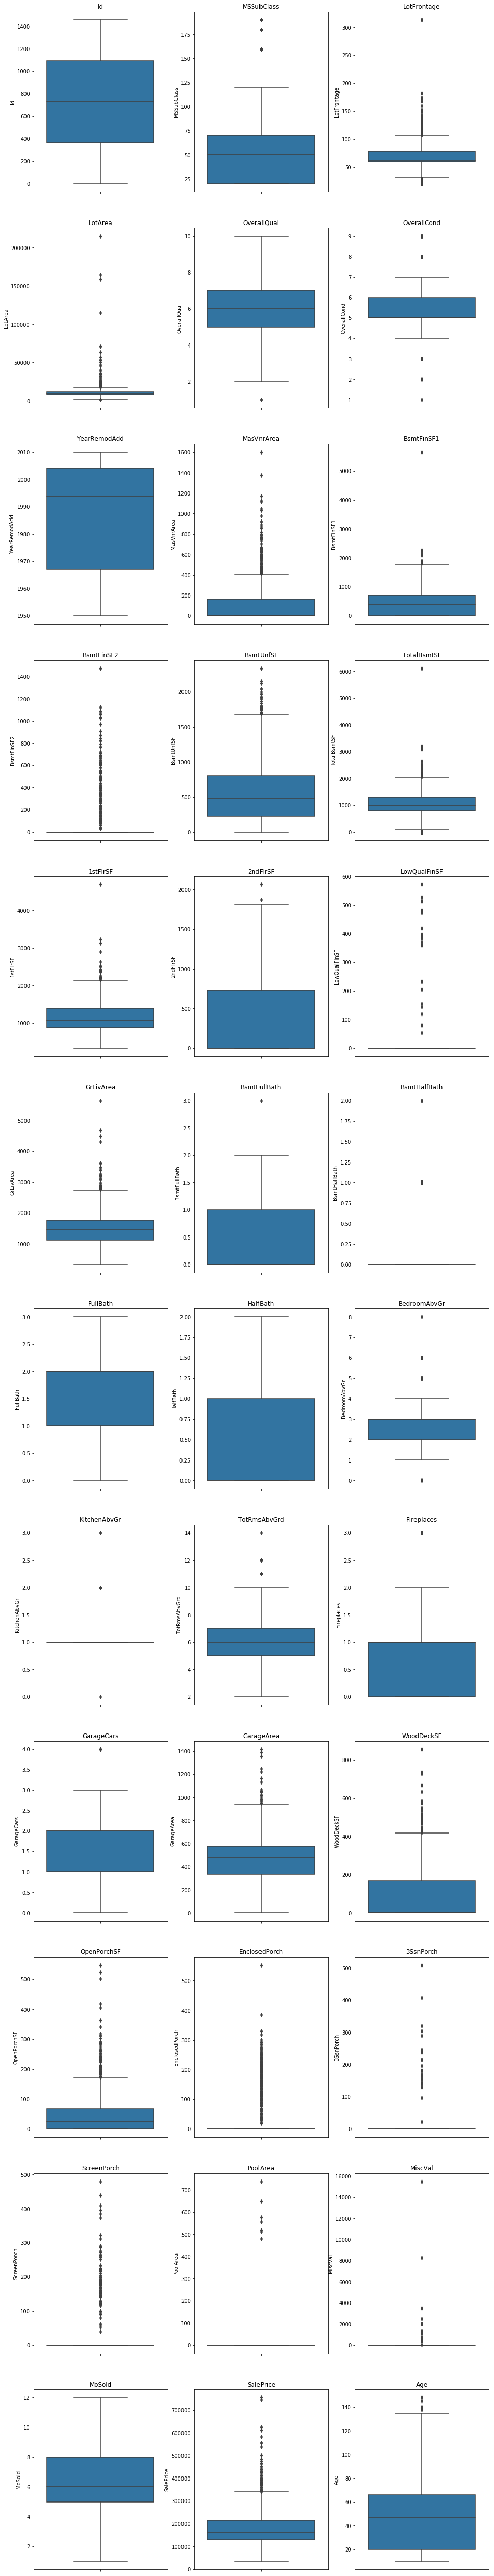

In [32]:
# boxplot to understand all numerical features
num_features=house.select_dtypes(exclude = "O").columns
plt.figure(figsize=(16,100))
for i in enumerate(num_features):
    plt.subplot((3+len(num_features))/3,3,i[0]+1)
    sns.boxplot( y = house[i[1]], data = house).set(title=i[1])

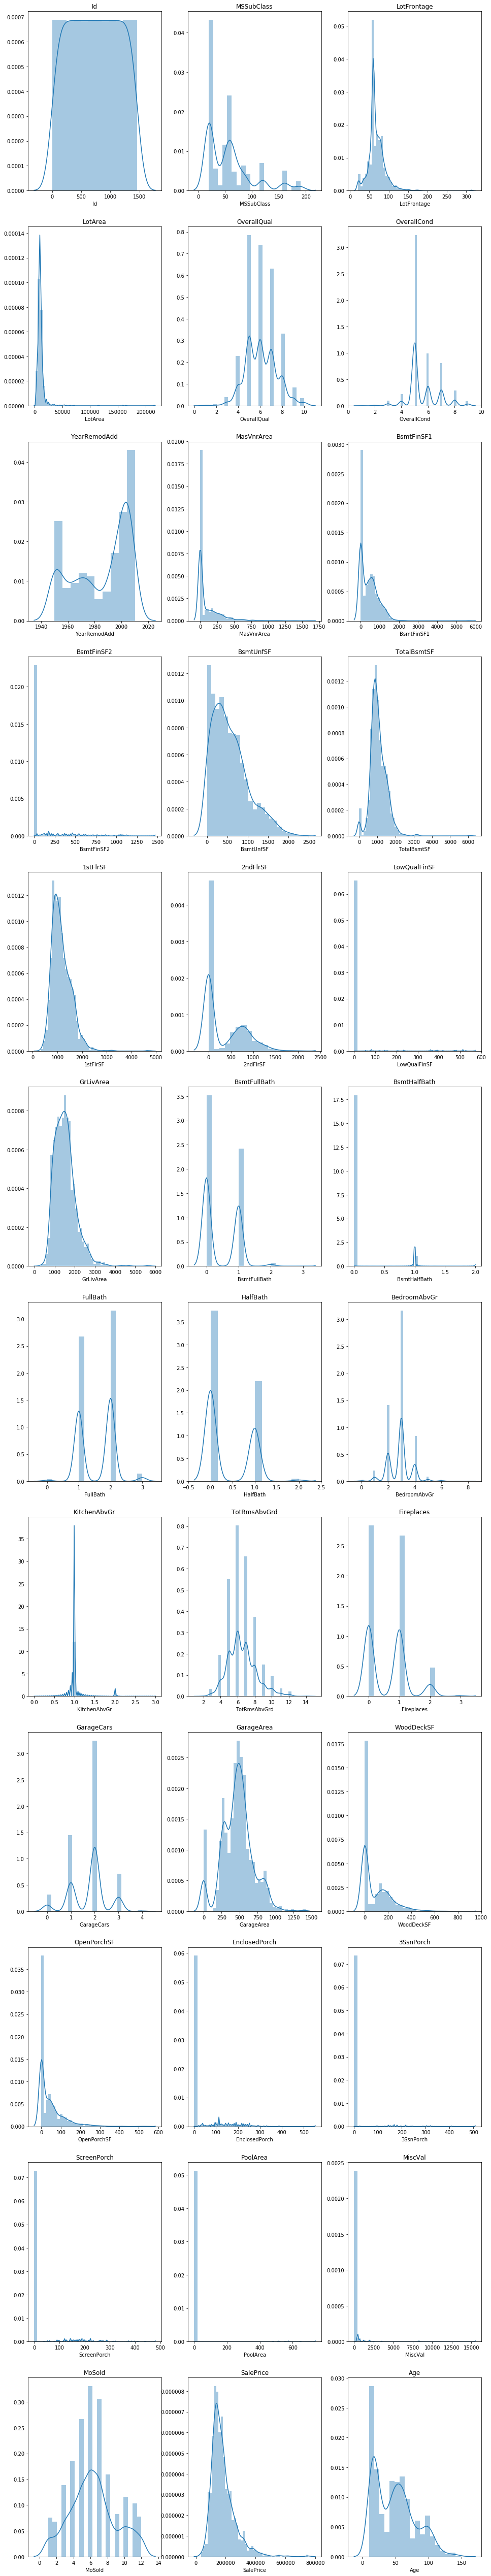

In [33]:
# distplot to understand distribution of all numerical features
num_features=house.select_dtypes(exclude = "O").columns
plt.figure(figsize=(16,100))
for i in enumerate(num_features):
    plt.subplot((3+len(num_features))/3,3,i[0]+1)
    sns.distplot(house[i[1]]).set(title=i[1])

In [34]:
#target variable(SalePrice) is not normaly distributed & is right skewed so needs transformation
house['SalePrice'] = np.log(house['SalePrice'])

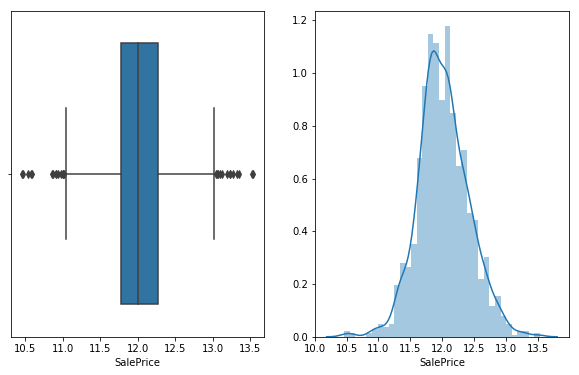

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(house['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(house['SalePrice'])

In [36]:
# correlation matrix
numerical_features=house.select_dtypes(exclude = "O")
cor = numerical_features.corr()

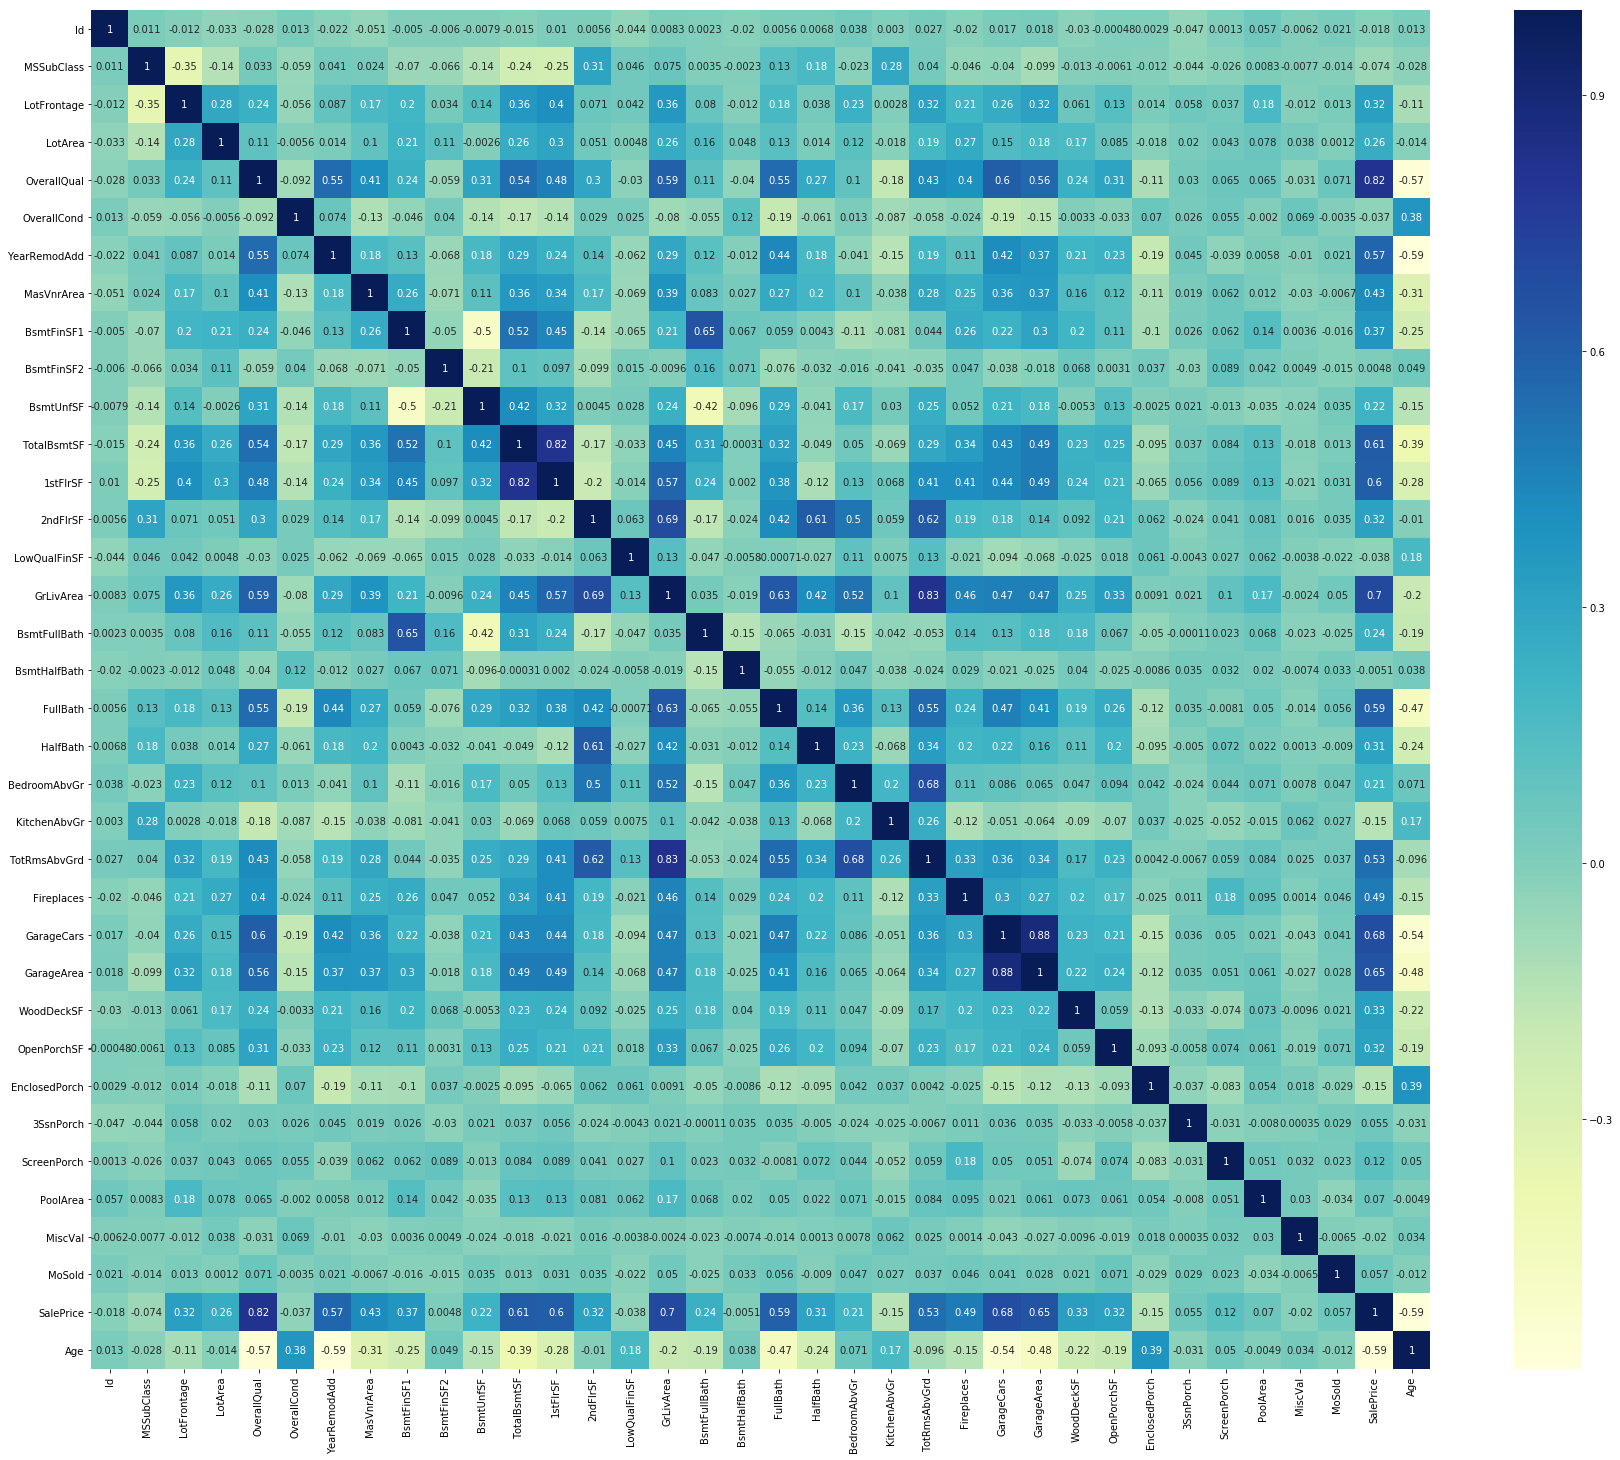

In [37]:
# plotting correlations on a heatmap
plt.figure(figsize=(30,25))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [38]:
# Checking highly correlated variables (above 0.7) 
corr = abs(numerical_features.corr()).stack().reset_index().sort_values(0, ascending = False)
corr.columns = ["col1","col2","correlation"]
corr[(corr.col1 != corr.col2) & (corr.correlation > 0.7)]

,col1,col2,correlation
924,GarageArea,GarageCars,0.882475
889,GarageCars,GarageArea,0.882475
807,TotRmsAbvGrd,GrLivArea,0.825489
562,GrLivArea,TotRmsAbvGrd,0.825489
443,1stFlrSF,TotalBsmtSF,0.819530
408,TotalBsmtSF,1stFlrSF,0.819530
1228,SalePrice,OverallQual,0.817184
178,OverallQual,SalePrice,0.817184
1239,SalePrice,GrLivArea,0.700927
574,GrLivArea,SalePrice,0.700927


#### Above features are higly correlated

### 2.Bivariate Analysis

In [39]:
num_features=house.select_dtypes(include = "O").columns
num_features

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

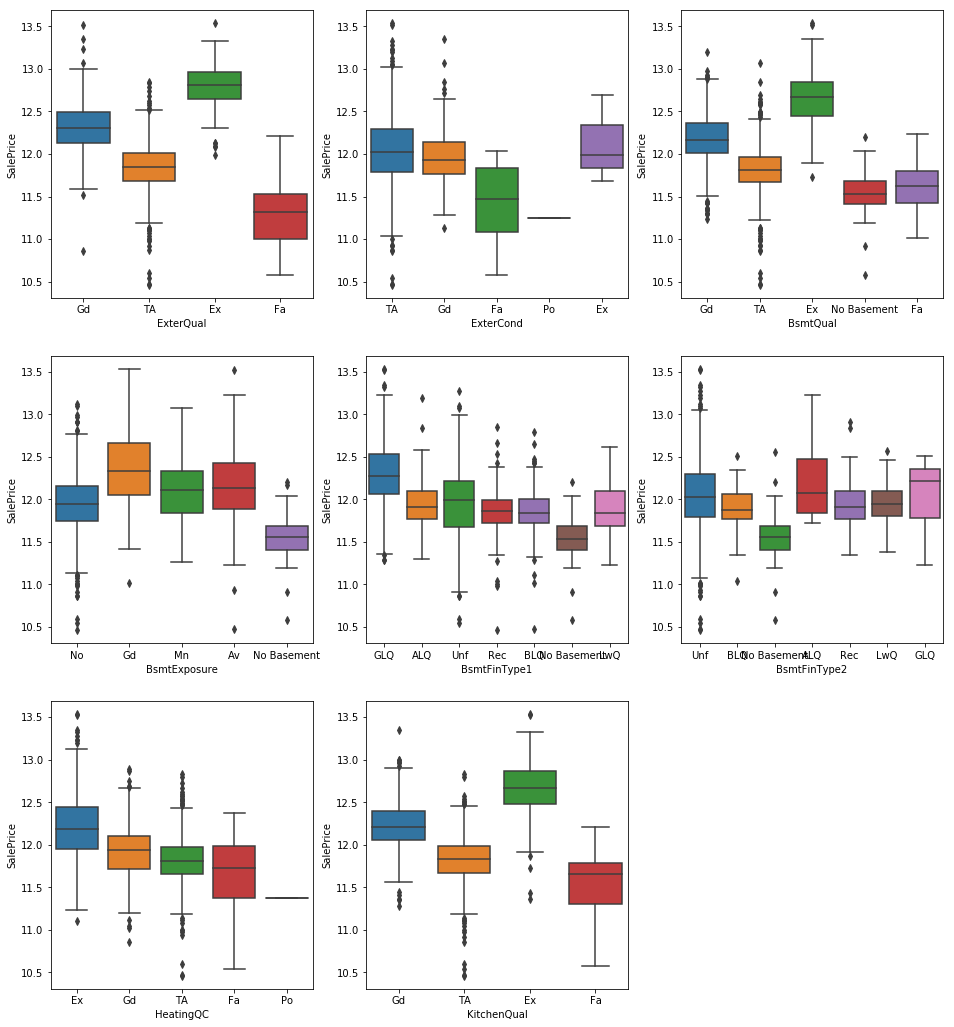

In [40]:
#Ordered categorical feature analysis
ordered_categorical=['ExterQual','ExterCond','BsmtQual','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','KitchenQual']
plt.figure(figsize=(16,18))
for i in enumerate(ordered_categorical):
    plt.subplot((3+len(ordered_categorical))/3,3,i[0]+1)
    #sns.distplot(house[i[1]]).set(title=i[1])
    sns.boxplot(x=i[1],y='SalePrice' ,data = house)

In [41]:
house[['ExterQual']]=house[['ExterQual']].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1}))
house[['ExterCond']]=house[['ExterCond']].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}))
house[['BsmtQual']]=house[['BsmtQual']].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Basement':0}))
house[['BsmtExposure']]=house[['BsmtExposure']].apply(lambda x: x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0}))
house[['BsmtFinType1']]=house[['BsmtFinType1']].apply(lambda x: x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}))
house[['BsmtFinType2']]=house[['BsmtFinType2']].apply(lambda x: x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}))
house[['HeatingQC']]=house[['HeatingQC']].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}))
house[['KitchenQual']]=house[['KitchenQual']].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1}))

In [42]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,12.247694,17
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,3,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,12.109011,44
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,3,2,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,12.317167,19
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,2,1,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398,105
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,3,3,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,12.429216,20


### 3. Data Preparation 

In [43]:
# split into X and y
X = house.drop('SalePrice',axis=1)
y = house['SalePrice']
X.shape,y.shape

((1460, 59), (1460,))

In [44]:
house_categorical = X.select_dtypes(include='O')
house_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [45]:
house_categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,Unf,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn,WD,Normal


In [46]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [47]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [48]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [49]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=161)

In [50]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4. Model Building and Evaluation

### Ridge and Lasso Regression

### Ridge Regression

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,150,250,270,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 150, 250, 270, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [52]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 270}
-0.09370246653829091


In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004199,0.000996,0.000788,0.000394,0.0001,{'alpha': 0.0001},-0.103549,-0.098807,-0.107268,-0.089115,-0.103880,-0.100527,0.006306,30,-0.079711,-0.068546,-0.073518,-0.082510,-0.080025,-0.076862,0.005106
1,0.003590,0.000488,0.000797,0.000399,0.001,{'alpha': 0.001},-0.103548,-0.098807,-0.107268,-0.089114,-0.103880,-0.100526,0.006307,29,-0.079711,-0.068546,-0.073518,-0.082510,-0.080025,-0.076862,0.005106
2,0.003592,0.000489,0.000797,0.000399,0.01,{'alpha': 0.01},-0.103546,-0.098804,-0.107266,-0.089104,-0.103876,-0.100522,0.006310,28,-0.079711,-0.068546,-0.073516,-0.082511,-0.080025,-0.076862,0.005107
3,0.008178,0.002476,0.001196,0.000399,0.05,{'alpha': 0.05},-0.103536,-0.098794,-0.107260,-0.089058,-0.103858,-0.100504,0.006322,27,-0.079712,-0.068546,-0.073510,-0.082512,-0.080025,-0.076861,0.005108
4,0.004588,0.001352,0.001596,0.001739,0.1,{'alpha': 0.1},-0.103523,-0.098783,-0.107252,-0.089002,-0.103836,-0.100482,0.006338,26,-0.079712,-0.068546,-0.073502,-0.082513,-0.080025,-0.076860,0.005109


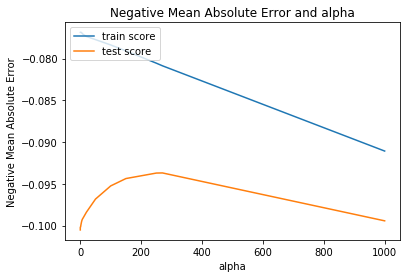

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = 270
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.95629455e-03, -1.05350879e-02, -3.49246345e-03,  1.39002533e-02,
        5.25977163e-02,  3.05591715e-02,  2.03208364e-02,  3.56552717e-03,
        1.06433733e-02,  1.37354856e-03,  2.04139429e-02,  1.69604427e-02,
        1.86850906e-02,  7.64867416e-03, -2.00105809e-03,  3.95660472e-03,
        3.76808687e-03,  1.32020630e-02,  1.11922161e-02,  2.70267006e-02,
        2.10413400e-02, -5.52156552e-04,  3.73115484e-02,  1.90303764e-02,
        1.73338656e-03,  2.11026623e-02,  1.47805225e-02,  1.36701937e-02,
       -1.15479280e-02,  2.05883054e-02,  2.32195514e-02,  2.33892422e-02,
        2.57084456e-02,  1.99778409e-02,  1.25833394e-02,  1.63803882e-04,
        3.41795677e-03,  6.42017685e-03,  8.63267313e-03, -9.51154974e-03,
       -1.90576369e-03, -7.50405527e-05, -1.74609103e-02,  7.70478914e-03,
        3.65091515e-03,  1.48292532e-02,  3.10411422e-05,  3.76166298e-03,
       -8.72906490e-03, -2.01443206e-04,  9.85863303e-03, -6.31447316e-03,
       -2.48376586e-03, -

In [56]:
prediction_ridge=ridge.predict(X_test)

In [57]:
print('Train Score {}'.format(ridge.score(X_train,y_train)))
print('Test Score {}'.format(ridge.score(X_test,y_test)))

Train Score 0.905926363041003
Test Score 0.8817831974348409


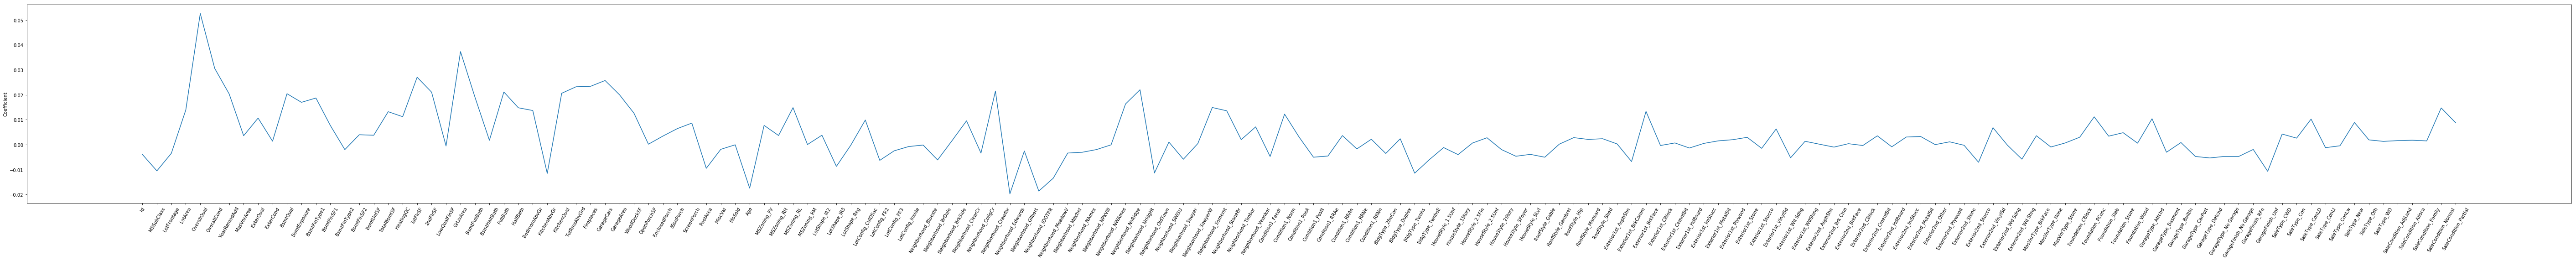

In [58]:
# plotting coeff value for each features
plt.figure(figsize=(100,8))
plt.plot(range(len(X_train.columns)),ridge.coef_)
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60)
plt.ylabel('Coefficient')
plt.show()

In [59]:
#top 10 features for predicting price
ridge_top10features = pd.DataFrame()
X = X_train
ridge_top10features['Ridge_Features'] = X.columns
ridge_top10features['Ridge_Coeff'] = [ridge.coef_[i] for i in range(X.shape[1])]
ridge_top10features['Ridge_Coeff'] = round(ridge_top10features['Ridge_Coeff'], 2)
ridge_top10features['AbsRidge_Coeff'] = abs(ridge_top10features['Ridge_Coeff'])
ridge_top10features = ridge_top10features.sort_values(by = "AbsRidge_Coeff", ascending = False)
ridgedf_top10=ridge_top10features.head(10)
ridgedf_top10

,Ridge_Features,Ridge_Coeff,AbsRidge_Coeff
4,OverallQual,0.05,0.05
22,GrLivArea,0.04,0.04
5,OverallCond,0.03,0.03
32,GarageCars,0.03,0.03
19,1stFlrSF,0.03,0.03
59,Neighborhood_Crawfor,0.02,0.02
30,TotRmsAbvGrd,0.02,0.02
31,Fireplaces,0.02,0.02
25,FullBath,0.02,0.02
23,BsmtFullBath,0.02,0.02


### After doubling the value of alpha

In [60]:
alpha = 540
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=540, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
print('Train Score {}'.format(ridge1.score(X_train,y_train)))
print('Test Score {}'.format(ridge1.score(X_test,y_test)))

Train Score 0.8969057157083914
Test Score 0.8764750821983084


In [62]:
#top 10 features for predicting price
ridge1_top10features = pd.DataFrame()
X = X_train
ridge1_top10features['Ridge_Features'] = X.columns
ridge1_top10features['Ridge_Coeff'] = [ridge1.coef_[i] for i in range(X.shape[1])]
ridge1_top10features['Ridge_Coeff'] = round(ridge1_top10features['Ridge_Coeff'], 2)
ridge1_top10features['AbsRidge_Coeff'] = abs(ridge1_top10features['Ridge_Coeff'])
ridge1_top10features = ridge1_top10features.sort_values(by = "AbsRidge_Coeff", ascending = False)
ridge1df_top10=ridge1_top10features.head(10)
ridge1df_top10

,Ridge_Features,Ridge_Coeff,AbsRidge_Coeff
4,OverallQual,0.04,0.04
22,GrLivArea,0.03,0.03
23,BsmtFullBath,0.02,0.02
30,TotRmsAbvGrd,0.02,0.02
69,Neighborhood_NridgHt,0.02,0.02
31,Fireplaces,0.02,0.02
32,GarageCars,0.02,0.02
25,FullBath,0.02,0.02
33,GarageArea,0.02,0.02
68,Neighborhood_NoRidge,0.02,0.02


### Lasso

In [63]:
params = {'alpha': [0.001,0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.07, 0.09, 1.0, 1.03, 1.04, 
 1.08, 2.0, 2.02,2.08,3.02,3.06,3.08]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.07, 0.09, 1.0, 1.03, 1.04, 1.08, 2.0, 2.02, 2.08, 3.02, 3.06, 3.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [64]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.004}
-0.09092177326487401


In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058434,0.019338,0.001397,0.001353,0.001,{'alpha': 0.001},-0.096673,-0.095044,-0.103109,-0.082271,-0.095907,-0.094603,0.006788,4,-0.079901,-0.070156,-0.074164,-0.082701,-0.080851,-0.077555,0.004671
1,0.017952,0.004184,0.001795,0.000746,0.004,{'alpha': 0.004},-0.090975,-0.094767,-0.098302,-0.080859,-0.089705,-0.090922,0.005862,1,-0.083687,-0.074361,-0.077341,-0.084960,-0.083970,-0.080864,0.004221
2,0.015359,0.001493,0.001596,0.000798,0.006,{'alpha': 0.006},-0.090716,-0.096476,-0.098454,-0.081906,-0.091145,-0.091738,0.005752,2,-0.086015,-0.077044,-0.080044,-0.087145,-0.086525,-0.083355,0.004056
3,0.012965,0.001784,0.001396,0.000489,0.008,{'alpha': 0.008},-0.090200,-0.098669,-0.099147,-0.083811,-0.093463,-0.093055,0.005697,3,-0.088360,-0.079775,-0.083017,-0.089455,-0.088940,-0.085910,0.003841
4,0.010971,0.002601,0.001396,0.000488,0.01,{'alpha': 0.01},-0.090369,-0.101280,-0.100287,-0.085746,-0.096151,-0.094762,0.005924,5,-0.090556,-0.082346,-0.085617,-0.091411,-0.091366,-0.088260,0.003655


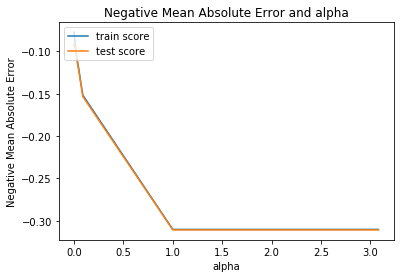

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
alpha =0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
prediction_lasso=lasso.predict(X_test)

In [69]:
print('Train Score {}'.format(lasso.score(X_train,y_train)))
print('Test Score {}'.format(lasso.score(X_test,y_test)))

Train Score 0.9046794291135135
Test Score 0.886180836982245


In [70]:
lasso.coef_

array([-0.00000000e+00, -2.18353739e-02, -0.00000000e+00,  1.33829622e-02,
        8.61522390e-02,  3.78490107e-02,  1.70360777e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.90472013e-02,  1.57767531e-02,
        2.03660258e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.51128325e-04,  1.09267366e-02,  1.30403893e-02,
        0.00000000e+00, -0.00000000e+00,  9.65240055e-02,  2.33739898e-02,
        0.00000000e+00,  1.31834472e-02,  7.12660768e-03,  8.86545480e-03,
       -4.53657711e-03,  1.62413899e-02,  1.23990307e-02,  2.06189722e-02,
        4.20405154e-02,  4.60978197e-03,  9.70727475e-03, -0.00000000e+00,
        0.00000000e+00,  3.11539535e-03,  6.88127927e-03, -1.19608353e-02,
       -0.00000000e+00, -0.00000000e+00, -3.24173702e-02,  0.00000000e+00,
        3.70328841e-04,  1.49382634e-02, -0.00000000e+00,  1.39407251e-03,
       -6.62501420e-03, -0.00000000e+00,  7.60324530e-03, -2.18066930e-03,
       -0.00000000e+00,  

In [71]:
#top 10 features for predicting price
lasso_top10features = pd.DataFrame()
X = X_train
lasso_top10features['lasso_Features'] = X.columns
lasso_top10features['lasso_Coeff'] = [lasso.coef_[i] for i in range(X.shape[1])]
lasso_top10features['lasso_Coeff'] = round(lasso_top10features['lasso_Coeff'], 2)
lasso_top10features['Abslasso_Coeff'] = abs(lasso_top10features['lasso_Coeff'])
lasso_top10features = lasso_top10features.sort_values(by = "Abslasso_Coeff", ascending = False)
lassodf_top10=lasso_top10features.head(10)
lassodf_top10

,lasso_Features,lasso_Coeff,Abslasso_Coeff
22,GrLivArea,0.10,0.10
4,OverallQual,0.09,0.09
32,GarageCars,0.04,0.04
5,OverallCond,0.04,0.04
42,Age,-0.03,0.03
69,Neighborhood_NridgHt,0.03,0.03
6,YearRemodAdd,0.02,0.02
59,Neighborhood_Crawfor,0.02,0.02
31,Fireplaces,0.02,0.02
29,KitchenQual,0.02,0.02


### After doubling the value of alpha

In [72]:
alpha =0.008

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train) 

Lasso(alpha=0.008, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
print('Train Score {}'.format(lasso1.score(X_train,y_train)))
print('Test Score {}'.format(lasso1.score(X_test,y_test)))

Train Score 0.8930659286789758
Test Score 0.879412980506506


In [74]:
#top 10 features for predicting price
lasso1_top10features = pd.DataFrame()
X = X_train
lasso1_top10features['lasso_Features'] = X.columns
lasso1_top10features['lasso_Coeff'] = [lasso1.coef_[i] for i in range(X.shape[1])]
lasso1_top10features['lasso_Coeff'] = round(lasso1_top10features['lasso_Coeff'], 2)
lasso1_top10features['Abslasso_Coeff'] = abs(lasso1_top10features['lasso_Coeff'])
lasso1_top10features = lasso1_top10features.sort_values(by = "Abslasso_Coeff", ascending = False)
lasso1df_top10=lasso1_top10features.head(10)
lasso1df_top10

,lasso_Features,lasso_Coeff,Abslasso_Coeff
22,GrLivArea,0.10,0.10
4,OverallQual,0.10,0.10
32,GarageCars,0.04,0.04
42,Age,-0.04,0.04
5,OverallCond,0.03,0.03
10,BsmtQual,0.02,0.02
29,KitchenQual,0.02,0.02
12,BsmtFinType1,0.02,0.02
45,MSZoning_RL,0.02,0.02
74,Neighborhood_Somerst,0.02,0.02


### Comparision between ridge & lasso

[Text(0.5, 1.0, 'Lasso')]

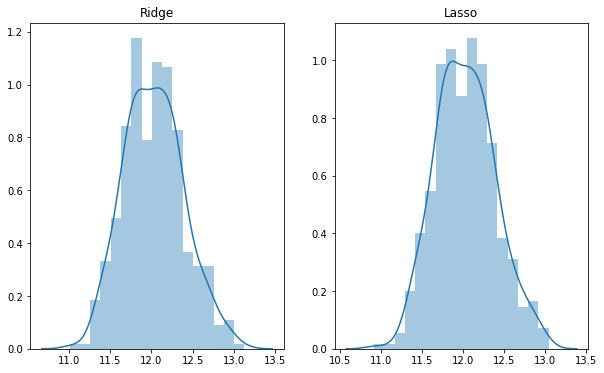

In [75]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(prediction_ridge).set(title='Ridge')
plt.subplot(1,2,2)
sns.distplot(prediction_lasso).set(title='Lasso')

In [76]:
print('--------- Performance of Ridge Regression-------')
print('Train Score {}'.format(ridge.score(X_train,y_train)))
print('Test Score {}'.format(ridge.score(X_test,y_test)))
print('--------- Performance of Lasso Regression-------')
print('Train Score {}'.format(lasso.score(X_train,y_train)))
print('Test Score {}'.format(lasso.score(X_test,y_test)))

--------- Performance of Ridge Regression-------
Train Score 0.905926363041003
Test Score 0.8817831974348409
--------- Performance of Lasso Regression-------
Train Score 0.9046794291135135
Test Score 0.886180836982245


In [77]:
#top10 faetures for Ridge & Lasso
ridge_lassodf=pd.concat([ridgedf_top10, lassodf_top10], axis = 1)
ridge_lassodf

,Ridge_Features,Ridge_Coeff,AbsRidge_Coeff,lasso_Features,lasso_Coeff,Abslasso_Coeff
4,OverallQual,0.05,0.05,OverallQual,0.09,0.09
5,OverallCond,0.03,0.03,OverallCond,0.04,0.04
6,NaN,NaN,NaN,YearRemodAdd,0.02,0.02
19,1stFlrSF,0.03,0.03,NaN,NaN,NaN
22,GrLivArea,0.04,0.04,GrLivArea,0.10,0.10
23,BsmtFullBath,0.02,0.02,NaN,NaN,NaN
25,FullBath,0.02,0.02,NaN,NaN,NaN
29,NaN,NaN,NaN,KitchenQual,0.02,0.02
30,TotRmsAbvGrd,0.02,0.02,NaN,NaN,NaN
31,Fireplaces,0.02,0.02,Fireplaces,0.02,0.02


### After removing 5 most important feature and model building for lasso

In [78]:
X_train=X_train.drop(['GrLivArea','OverallQual','GarageCars','OverallCond','Age'],axis=1)
X_test=X_test.drop(['GrLivArea','OverallQual','GarageCars','OverallCond','Age'],axis=1)

In [79]:
params = {'alpha': [0.001,0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.07, 0.09, 1.0, 1.03, 1.04, 
 1.08, 2.0, 2.02,2.08,3.02,3.06,3.08]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.07, 0.09, 1.0, 1.03, 1.04, 1.08, 2.0, 2.02, 2.08, 3.02, 3.06, 3.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [80]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.004}
-0.1016189922537948


In [81]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039094,0.020325,0.000798,3.992319e-04,0.001,{'alpha': 0.001},-0.103174,-0.106339,-0.113701,-0.095751,-0.105865,-0.104964,0.005779,5,-0.087479,-0.078211,-0.082133,-0.089979,-0.087691,-0.085099,0.004300
1,0.008577,0.000487,0.001197,3.981861e-04,0.004,{'alpha': 0.004},-0.097711,-0.106432,-0.109778,-0.092954,-0.101239,-0.101619,0.006002,1,-0.092824,-0.083774,-0.085922,-0.092760,-0.091895,-0.089435,0.003821
2,0.006979,0.000631,0.000799,3.994229e-04,0.006,{'alpha': 0.006},-0.097377,-0.107314,-0.110191,-0.092619,-0.101537,-0.101803,0.006397,2,-0.094669,-0.086685,-0.088398,-0.094657,-0.094384,-0.091759,0.003487
3,0.006383,0.000490,0.000399,4.891618e-04,0.008,{'alpha': 0.008},-0.097474,-0.109167,-0.111267,-0.092735,-0.104263,-0.102976,0.006982,3,-0.096512,-0.089027,-0.090767,-0.096672,-0.096644,-0.093924,0.003335
4,0.005783,0.000747,0.001000,9.221592e-07,0.01,{'alpha': 0.01},-0.097837,-0.111269,-0.113152,-0.093578,-0.106924,-0.104545,0.007618,4,-0.098913,-0.091710,-0.093167,-0.099049,-0.098905,-0.096349,0.003226


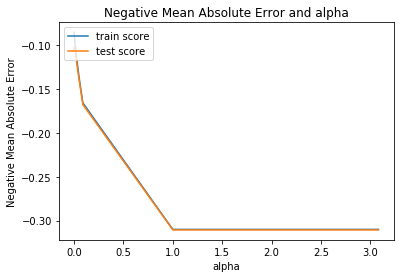

In [82]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [83]:
alpha =0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
print('Train Score {}'.format(lasso.score(X_train,y_train)))
print('Test Score {}'.format(lasso.score(X_test,y_test)))

Train Score 0.8869715333995538
Test Score 0.8556237438873588


In [85]:
#top 10 features for predicting price
lasso_top10features = pd.DataFrame()
X = X_train
lasso_top10features['lasso_Features'] = X.columns
lasso_top10features['lasso_Coeff'] = [lasso.coef_[i] for i in range(X.shape[1])]
lasso_top10features['lasso_Coeff'] = round(lasso_top10features['lasso_Coeff'], 2)
lasso_top10features['Abslasso_Coeff'] = abs(lasso_top10features['lasso_Coeff'])
lasso_top10features = lasso_top10features.sort_values(by = "Abslasso_Coeff", ascending = False)
lassodf_top10=lasso_top10features.head(5)
lassodf_top10

,lasso_Features,lasso_Coeff,Abslasso_Coeff
18,2ndFlrSF,0.08,0.08
17,1stFlrSF,0.08,0.08
4,YearRemodAdd,0.04,0.04
8,BsmtQual,0.04,0.04
29,GarageArea,0.04,0.04
